# 📊 Python Visualization Libraries: Hands-On Practice

**Week 14 | CS 5130: Applied Programming and Data Processing for AI**

In this notebook, you'll practice using three essential Python visualization libraries:
- **Matplotlib** - The foundation of Python plotting
- **Seaborn** - Statistical visualization made beautiful
- **Plotly** - Interactive visualizations for the web

⏱️ **Estimated Time:** 30-45 minutes

## Setup: Import Libraries and Load Data

In [ ]:
# Standard imports
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set default styles
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print("✅ Libraries loaded successfully!")

✅ Libraries loaded successfully!


In [ ]:
# Load the Gapminder dataset (built into Plotly)
df = px.data.gapminder()

# Quick look at the data
print(f"Dataset shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print(f"\nYears available: {sorted(df['year'].unique())}")
print(f"\nContinents: {list(df['continent'].unique())}")

df.head()

Dataset shape: (1704, 8)

Columns: ['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap', 'iso_alpha', 'iso_num']

Years available: [np.int64(1952), np.int64(1957), np.int64(1962), np.int64(1967), np.int64(1972), np.int64(1977), np.int64(1982), np.int64(1987), np.int64(1992), np.int64(1997), np.int64(2002), np.int64(2007)]

Continents: ['Asia', 'Europe', 'Africa', 'Americas', 'Oceania']


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


---
## Part 1: Matplotlib Fundamentals

Matplotlib gives you full control over every element of your visualization.

### 1.1 Basic Line Plot with Customization

Let's track the population of the United States over time.

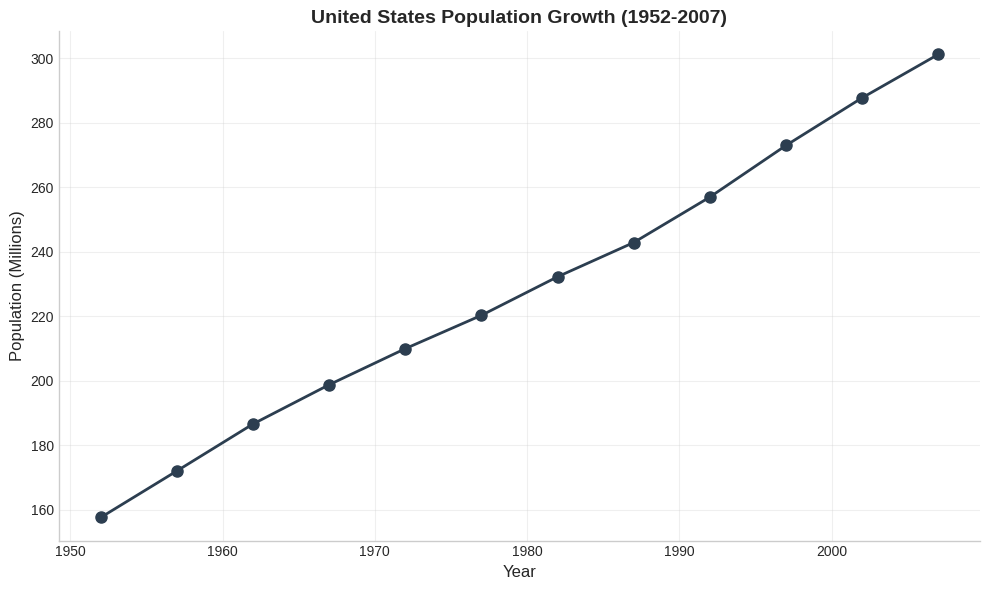

In [ ]:
# Filter data for United States
usa = df[df['country'] == 'United States']

# Create figure and axes using the recommended approach
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
ax.plot(usa['year'], usa['pop'] / 1e6,
        marker='o',
        linewidth=2,
        color='#2c3e50',
        markersize=8)

# Customize the plot
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population (Millions)', fontsize=12)
ax.set_title('United States Population Growth (1952-2007)', fontsize=14, fontweight='bold')

# Clean up the spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add grid
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 🏋️ Exercise 1.1

Modify the code above to plot China's population instead. Change the color to `#e07a5f` (coral).

In [ ]:
# YOUR CODE HERE
# Hint: Filter for country == 'China'



### 1.2 Subplots: Multiple Plots in One Figure

Compare different continents side by side.

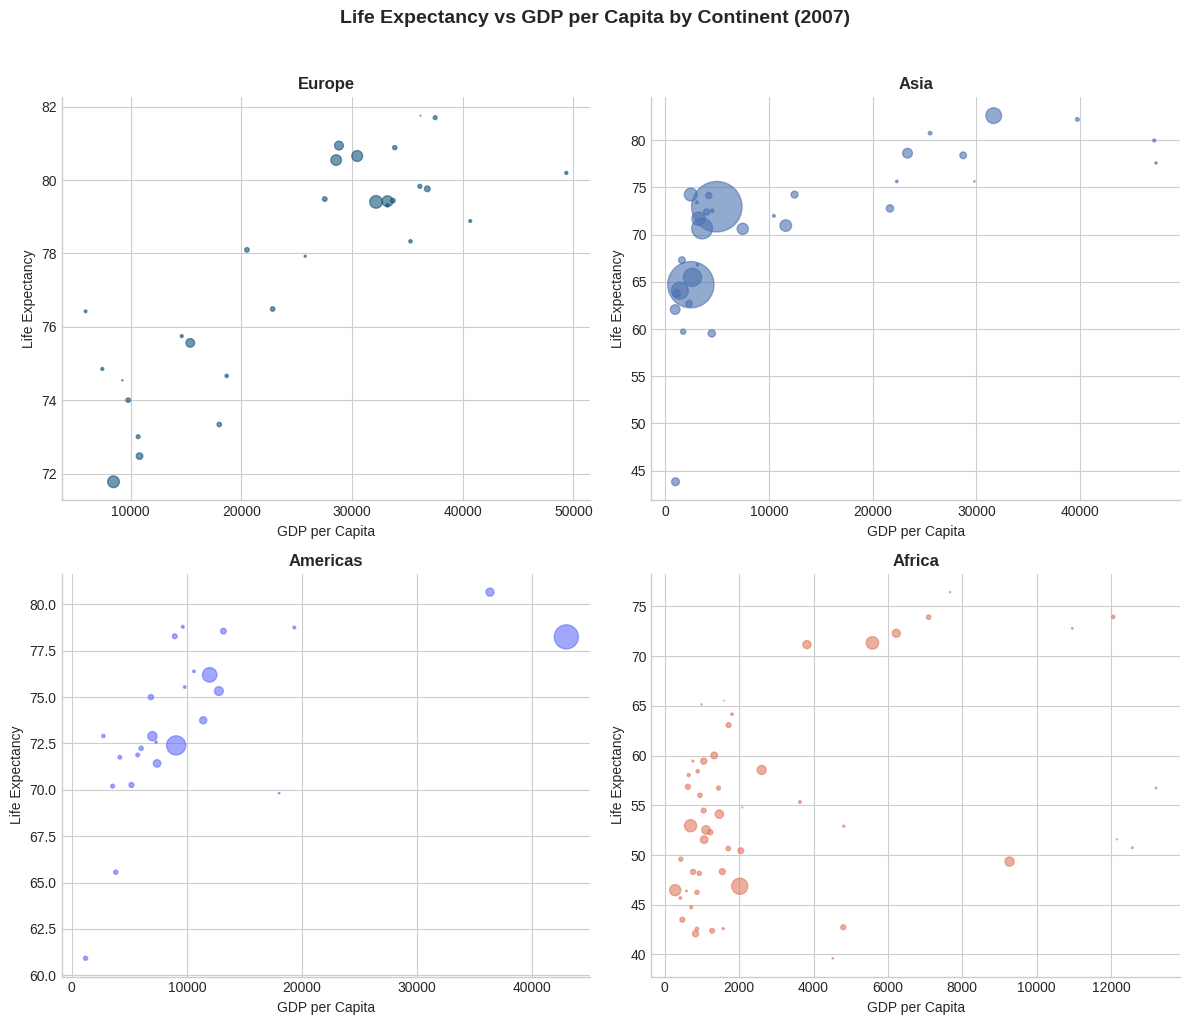

In [ ]:
# Get 2007 data for each continent
data_2007 = df[df['year'] == 2007]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

continents = ['Europe', 'Asia', 'Americas', 'Africa']
colors = ['#11557c', '#4c72b0', '#636efa', '#e07a5f']

for ax, continent, color in zip(axes.flat, continents, colors):
    continent_data = data_2007[data_2007['continent'] == continent]

    # Create scatter plot
    ax.scatter(continent_data['gdpPercap'],
               continent_data['lifeExp'],
               s=continent_data['pop'] / 1e6,  # Size by population
               alpha=0.6,
               color=color)

    ax.set_xlabel('GDP per Capita')
    ax.set_ylabel('Life Expectancy')
    ax.set_title(continent, fontweight='bold')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

fig.suptitle('Life Expectancy vs GDP per Capita by Continent (2007)',
             fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

---
## Part 2: Seaborn - Statistical Visualization

Seaborn makes it easy to create beautiful statistical visualizations with minimal code.

### 2.1 Distribution Plots

Visualize how life expectancy varies across continents.

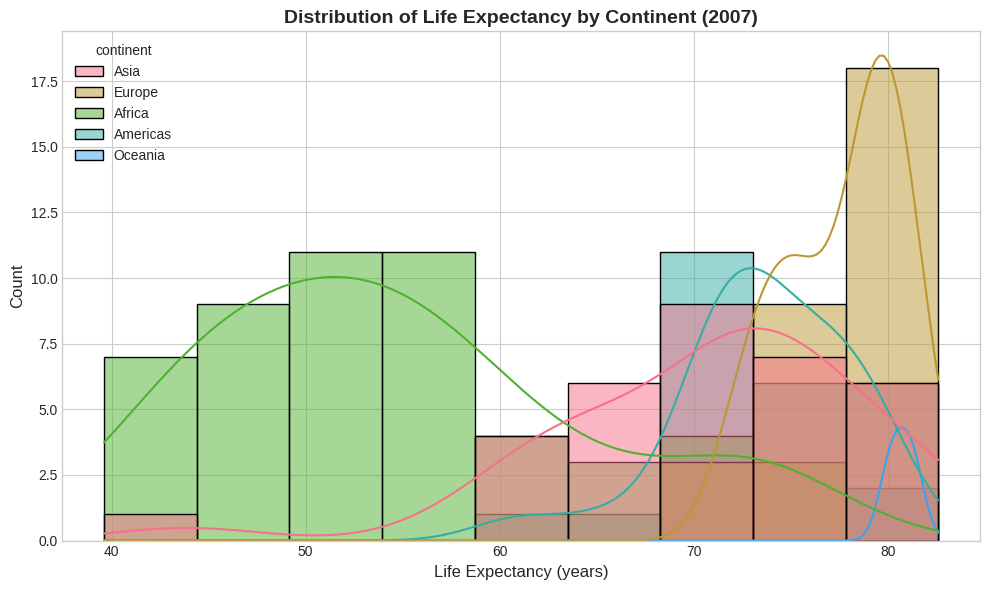

In [ ]:
# Histogram with KDE by continent
fig, ax = plt.subplots(figsize=(10, 6))

sns.histplot(data=data_2007,
             x='lifeExp',
             hue='continent',
             kde=True,
             alpha=0.5,
             ax=ax)

ax.set_xlabel('Life Expectancy (years)', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Distribution of Life Expectancy by Continent (2007)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 2.2 Categorical Plots: Box and Violin

Compare the distributions more directly.

/tmp/ipython-input-3400698012.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_2007,
/tmp/ipython-input-3400698012.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=data_2007,


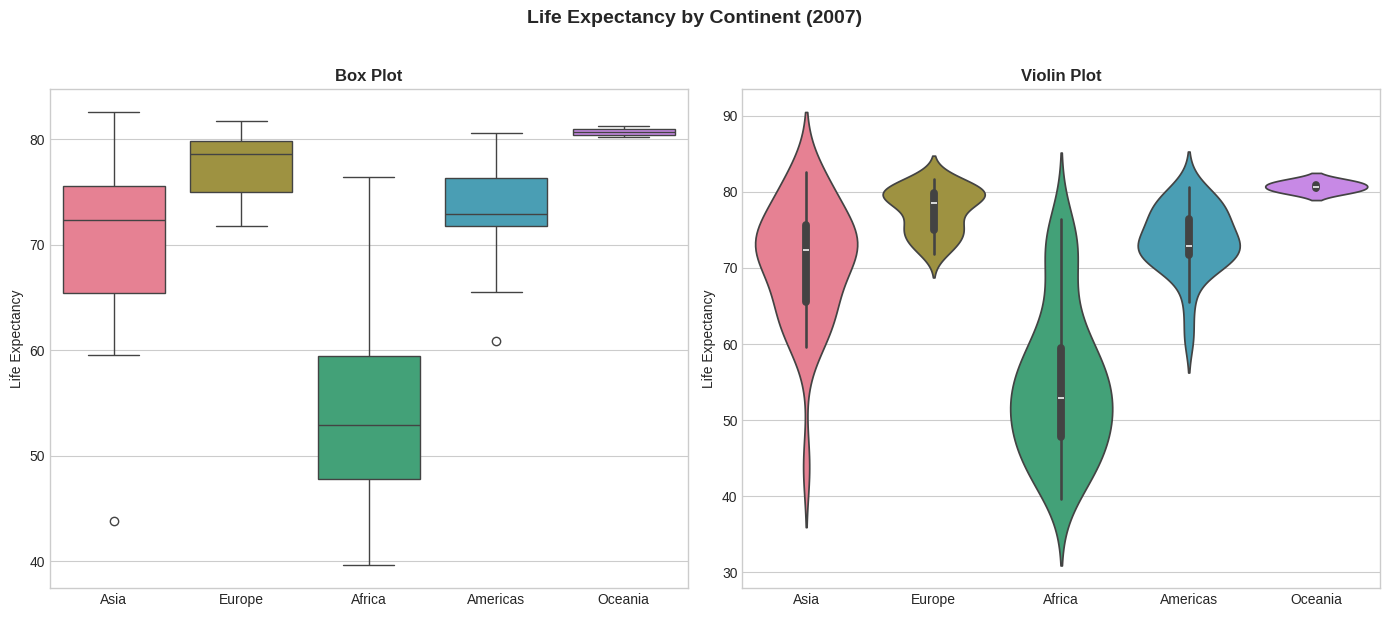

In [ ]:
# Side-by-side comparison: Box plot and Violin plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Box plot
sns.boxplot(data=data_2007,
            x='continent',
            y='lifeExp',
            palette='husl',
            ax=axes[0])
axes[0].set_title('Box Plot', fontweight='bold')
axes[0].set_xlabel('')
axes[0].set_ylabel('Life Expectancy')

# Violin plot
sns.violinplot(data=data_2007,
               x='continent',
               y='lifeExp',
               palette='husl',
               ax=axes[1])
axes[1].set_title('Violin Plot', fontweight='bold')
axes[1].set_xlabel('')
axes[1].set_ylabel('Life Expectancy')

fig.suptitle('Life Expectancy by Continent (2007)', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

### 2.3 Relationship Plots with Regression

See the relationship between GDP and life expectancy.

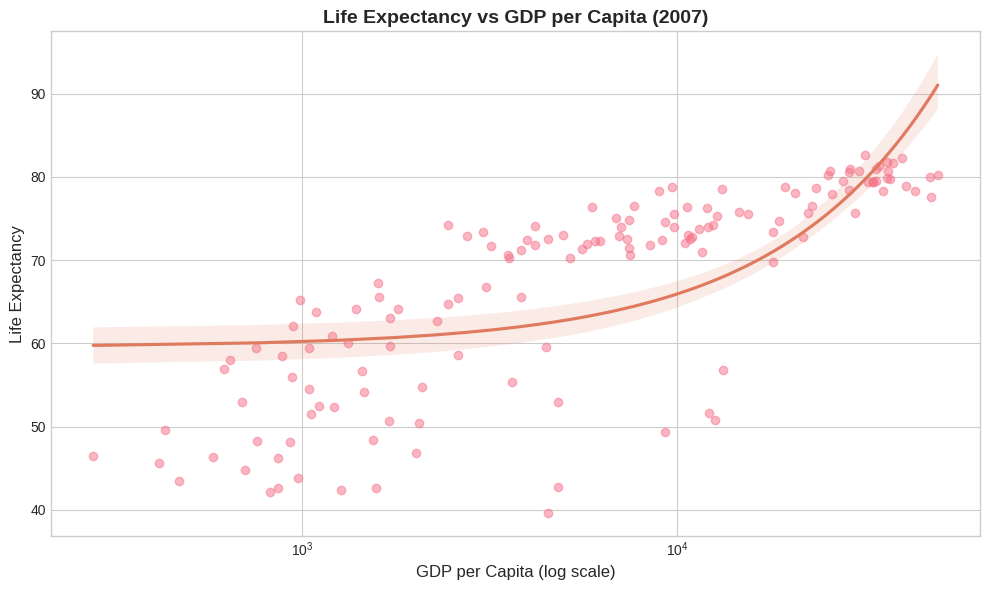

In [ ]:
# Scatter plot with regression line
fig, ax = plt.subplots(figsize=(10, 6))

# Using log scale for GDP makes the relationship clearer
sns.regplot(data=data_2007,
            x='gdpPercap',
            y='lifeExp',
            scatter_kws={'alpha': 0.5},
            line_kws={'color': '#e07a5f'},
            ax=ax)

ax.set_xscale('log')
ax.set_xlabel('GDP per Capita (log scale)', fontsize=12)
ax.set_ylabel('Life Expectancy', fontsize=12)
ax.set_title('Life Expectancy vs GDP per Capita (2007)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

### 2.4 Heatmap: Correlation Matrix

Visualize correlations between numeric variables.

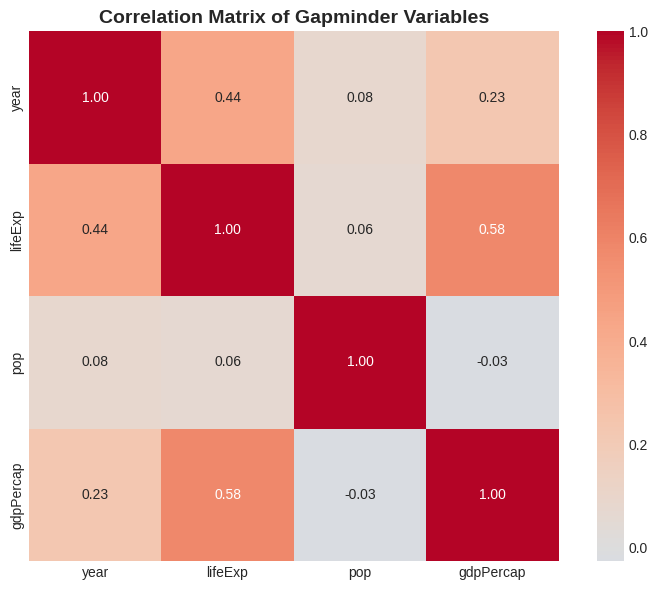

In [ ]:
# Calculate correlation matrix for numeric columns
numeric_cols = ['year', 'lifeExp', 'pop', 'gdpPercap']
corr_matrix = df[numeric_cols].corr()

# Create heatmap
fig, ax = plt.subplots(figsize=(8, 6))

sns.heatmap(corr_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            ax=ax)

ax.set_title('Correlation Matrix of Gapminder Variables', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 🏋️ Exercise 2.1

Create a pair plot to see all pairwise relationships. Use `hue='continent'` to color by continent.

**Hint:** Use `sns.pairplot()`

In [ ]:
# YOUR CODE HERE
# Use data_2007 and select columns: lifeExp, gdpPercap, pop



---
## Part 3: Plotly - Interactive Visualization

Plotly creates interactive charts with zoom, pan, and hover tooltips built-in.

### 3.1 Interactive Scatter Plot

The famous Gapminder bubble chart! Hover over the bubbles to see country details.

In [ ]:
# Interactive scatter plot with Plotly Express
fig = px.scatter(data_2007,
                 x='gdpPercap',
                 y='lifeExp',
                 size='pop',
                 color='continent',
                 hover_name='country',
                 log_x=True,
                 size_max=60,
                 title='Life Expectancy vs GDP per Capita (2007)')

fig.update_layout(template='plotly_white')
fig.show()

### 3.2 Animated Visualization

Watch the world evolve over time! Press the Play button.

In [ ]:
# Animated scatter plot over time
fig = px.scatter(df,
                 x='gdpPercap',
                 y='lifeExp',
                 size='pop',
                 color='continent',
                 hover_name='country',
                 log_x=True,
                 size_max=60,
                 animation_frame='year',
                 animation_group='country',
                 range_x=[100, 100000],
                 range_y=[25, 90],
                 title='Gapminder: Life Expectancy vs GDP (1952-2007)')

fig.update_layout(template='plotly_white')
fig.show()

### 3.3 Interactive Bar Chart

In [ ]:
# Average life expectancy by continent over time
avg_by_continent = df.groupby(['year', 'continent'])['lifeExp'].mean().reset_index()

fig = px.bar(avg_by_continent,
             x='continent',
             y='lifeExp',
             color='continent',
             animation_frame='year',
             range_y=[30, 85],
             title='Average Life Expectancy by Continent Over Time')

fig.update_layout(template='plotly_white', showlegend=False)
fig.show()

### 3.4 Geographic Visualization

In [ ]:
# World map of life expectancy
fig = px.choropleth(data_2007,
                    locations='iso_alpha',
                    color='lifeExp',
                    hover_name='country',
                    color_continuous_scale='RdYlGn',
                    title='Life Expectancy Around the World (2007)')

fig.update_layout(template='plotly_white')
fig.show()

### 🏋️ Exercise 3.1

Create an interactive line chart showing how the GDP per capita of the G7 countries has changed over time.

G7 countries: United States, United Kingdom, France, Germany, Italy, Japan, Canada

**Hint:** Filter the dataframe first, then use `px.line()`

In [ ]:
# YOUR CODE HERE
g7_countries = ['United States', 'United Kingdom', 'France', 'Germany', 'Italy', 'Japan', 'Canada']



---
## Part 4: Comparison Challenge

Now let's create the same visualization using all three libraries to see the differences.

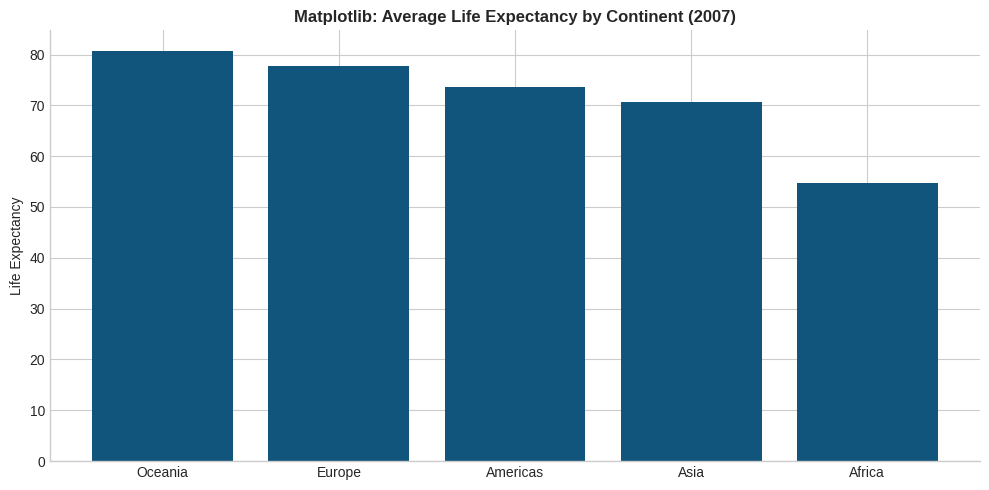

In [ ]:
# Task: Bar chart of average life expectancy by continent in 2007

# Prepare data
continent_avg = data_2007.groupby('continent')['lifeExp'].mean().sort_values(ascending=False)

# --- MATPLOTLIB ---
fig, ax = plt.subplots(figsize=(10, 5))
ax.bar(continent_avg.index, continent_avg.values, color='#11557c')
ax.set_ylabel('Life Expectancy')
ax.set_title('Matplotlib: Average Life Expectancy by Continent (2007)', fontweight='bold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.tight_layout()
plt.show()

/tmp/ipython-input-718114690.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




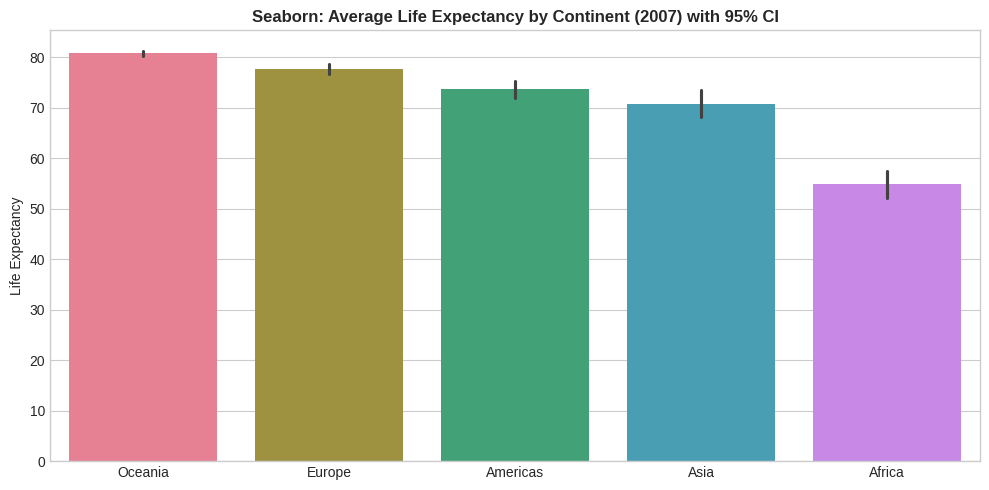

In [ ]:
# --- SEABORN ---
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=data_2007, x='continent', y='lifeExp', palette='husl',
            order=continent_avg.index, errorbar=('ci', 95), ax=ax)
ax.set_ylabel('Life Expectancy')
ax.set_xlabel('')
ax.set_title('Seaborn: Average Life Expectancy by Continent (2007) with 95% CI', fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
# --- PLOTLY ---
fig = px.bar(continent_avg.reset_index(),
             x='continent',
             y='lifeExp',
             color='continent',
             title='Plotly: Average Life Expectancy by Continent (2007)')
fig.update_layout(template='plotly_white', showlegend=False)
fig.show()

---
## Summary: When to Use Each Library

| Need | Library | Why |
|------|---------|-----|
| Quick EDA | Seaborn | Works with pandas, beautiful defaults |
| Full customization | Matplotlib | Control every pixel |
| Publication figures | Matplotlib | Fine-grained control, vector export |
| Statistical plots | Seaborn | Built-in confidence intervals |
| Interactive dashboard | Plotly | Zoom, pan, hover built-in |
| Animated visualization | Plotly | animation_frame parameter |
| Share with non-coders | Plotly | Export to HTML |

**Pro Tip:** You don't have to choose just one! Use Seaborn for exploration, Matplotlib for fine-tuning, and Plotly for sharing.

---
## 🎉 Congratulations!

You've now practiced with all three major Python visualization libraries. Key takeaways:

1. **Matplotlib** is the foundation - learn `fig, ax = plt.subplots()` pattern
2. **Seaborn** is built on Matplotlib - use it for statistical visualizations
3. **Plotly** adds interactivity - perfect for exploration and sharing

Remember: Good visualizations tell a story. The library is just the tool!